In [1]:
using Pkg
Pkg.activate("../../Project.toml")

include("../../LogLoss/RealRealHighDimension.jl")
include("../ForecastingMainNew.jl");
using JLD2
using DataFrames


  Activating project at `~/Documents/QML Project/QuantumInspiredML`


# ECG

In [5]:
svpath = "../paper/ecg200/mps_saves/legendreNN2_d8_chi35.jld2"

f = jldopen(svpath, "r")
    X_train_scaled = read(f, "X_train_scaled")
    y_train = read(f, "y_train")
    X_test_scaled = read(f, "X_test_scaled")
    y_test = read(f, "y_test");
    mps = read(f, "mps")
    opts = read(f, "opts")
close(f)

fc = load_forecasting_info_variables(mps, X_train_scaled, y_train, X_test_scaled, y_test, opts);

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 100 training samples and 100 testing samples.
 - 2 class(es) was detected. Slicing MPS into individual states...
 - Time independent encoding - Legendre_No_Norm - detected.
 - d = 8, chi_max = 35

 Created 2 forecastable struct(s) containing class-wise mps and test samples.


In [9]:
ns = 6


samples = [1:ns; 1:ns]
classes = [zeros(Int,ns); ones(Int,ns)]

ps = []
for (i,s) in enumerate(samples)
    class = classes[i]
    interp_sites = collect(2:size(X_train_scaled,2))
    instance_idx = s
    stat, p1 = any_interpolate_single_time_series(fc, class, instance_idx, interp_sites, :directMode; MSE_baseline=false, X_train_scaled=X_train_scaled, y_train=y_train);
    push!(ps, p1)
end

╭────────┬───────────╮
│ Metric │     Value │
├────────┼───────────┤
│  SMAPE │  0.876136 │
│    MSE │ 0.0791111 │
│   MAPE │   6.86248 │
│    MAE │   0.20724 │
│   RMSE │ 0.0791111 │
╰────────┴───────────╯
╭────────┬──────────╮
│ Metric │    Value │
├────────┼──────────┤
│  SMAPE │ 0.965858 │
│    MSE │   0.2732 │
│   MAPE │  1.53352 │
│    MAE │ 0.385794 │
│   RMSE │   0.2732 │
╰────────┴──────────╯
╭────────┬──────────╮
│ Metric │    Value │
├────────┼──────────┤
│  SMAPE │  1.46116 │
│    MSE │  0.32749 │
│   MAPE │  4.81895 │
│    MAE │ 0.464749 │
│   RMSE │  0.32749 │
╰────────┴──────────╯
╭────────┬──────────╮
│ Metric │    Value │
├────────┼──────────┤
│  SMAPE │ 0.906878 │
│    MSE │ 0.289031 │
│   MAPE │  12.0969 │
│    MAE │ 0.331963 │
│   RMSE │ 0.289031 │
╰────────┴──────────╯
╭────────┬───────────╮
│ Metric │     Value │
├────────┼───────────┤
│  SMAPE │  0.425709 │
│    MSE │ 0.0222476 │
│   MAPE │   0.51718 │
│    MAE │  0.117487 │
│   RMSE │ 0.0222476 │
╰────────┴─────

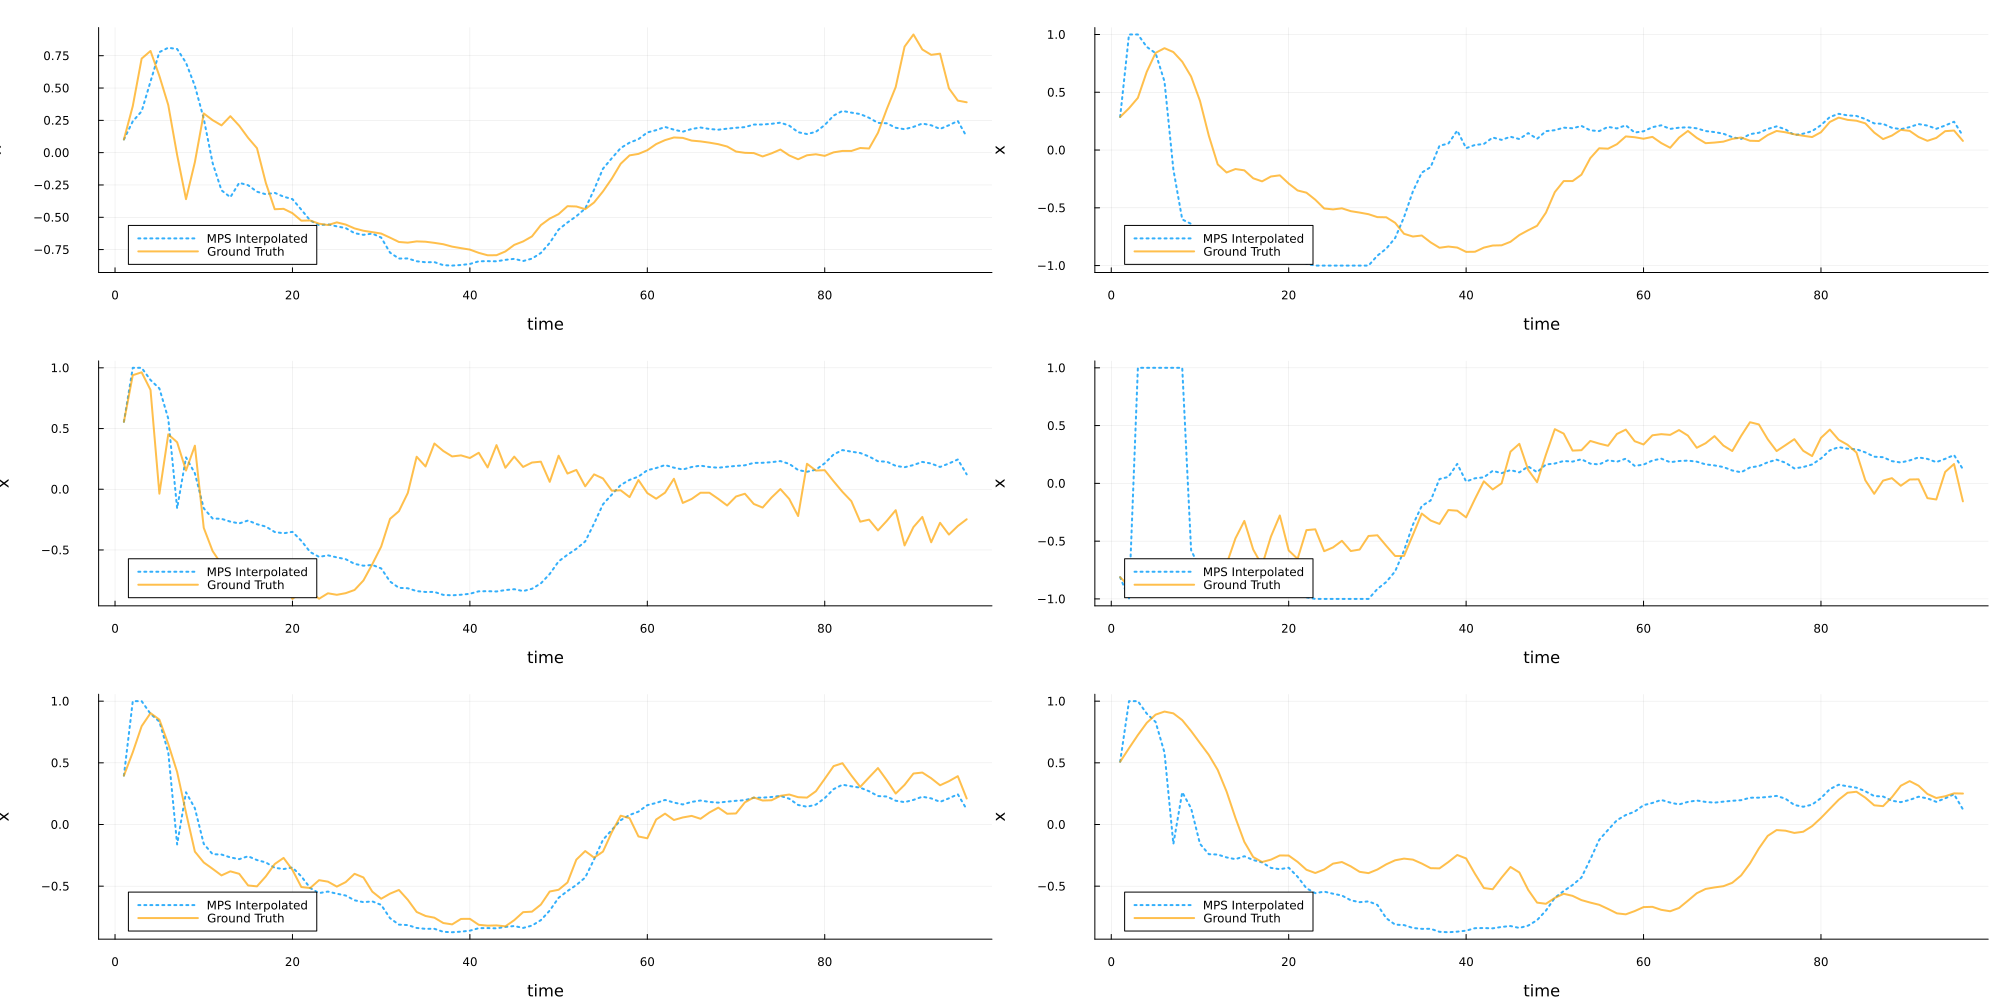

In [14]:

p1 = plot(ps[1:6]..., size=(2000,1000), layout=(3,2))
p2= plot(ps[7:12]..., size=(2000,1000), layout=(3,2));
savefig(p1, "figs/ecg200_Ex1.svg")
savefig(p2, "figs/ecg200_Ex2.svg")
display(p1)

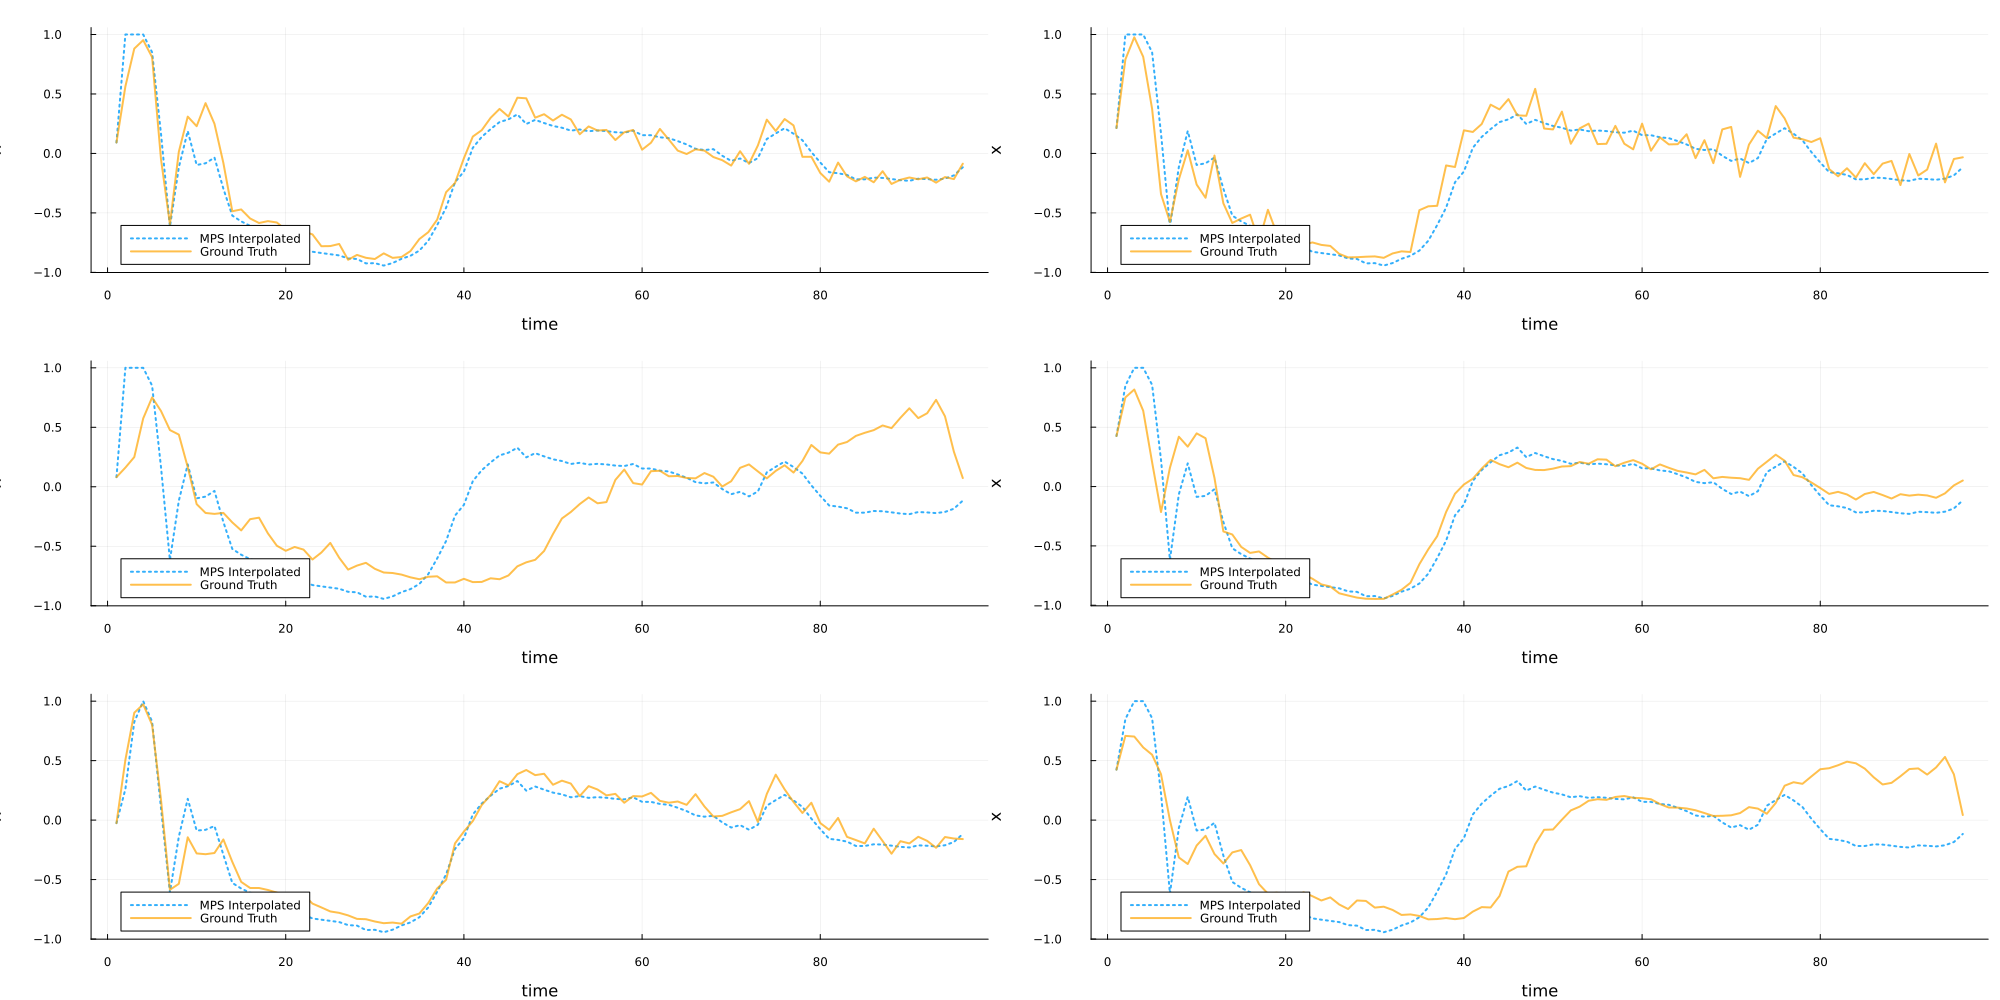

In [15]:
display(p2)

# CG No Sigmoid


In [5]:
svpath = "../paper/ecg200/mps_saves/legendreNN2_ns_d8_chi35.jld2"

f = jldopen(svpath, "r")
    X_train_scaled = read(f, "X_train_scaled")
    y_train = read(f, "y_train")
    X_test_scaled = read(f, "X_test_scaled")
    y_test = read(f, "y_test");
    mps = read(f, "mps")
    opts = read(f, "opts")
close(f)

fc = load_forecasting_info_variables(mps, X_train_scaled, y_train, X_test_scaled, y_test, opts);

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 100 training samples and 100 testing samples.
 - 2 class(es) was detected. Slicing MPS into individual states...
 - Time independent encoding - Legendre_No_Norm - detected.
 - d = 8, chi_max = 35

 Created 2 forecastable struct(s) containing class-wise mps and test samples.


In [6]:
ns = 6


samples = [1:ns; 1:ns]
classes = [zeros(Int,ns); ones(Int,ns)]

ps = []
for (i,s) in enumerate(samples)
    class = classes[i]
    interp_sites = collect(2:size(X_train_scaled,2))
    instance_idx = s
    stat, p1 = any_interpolate_single_time_series(fc, class, instance_idx, interp_sites, :directMode; MSE_baseline=false, X_train_scaled=X_train_scaled, y_train=y_train);
    push!(ps, p1)
end

╭────────┬───────────╮
│ Metric │     Value │
├────────┼───────────┤
│  SMAPE │  0.730285 │
│    MSE │ 0.0410405 │
│   MAPE │   1.20226 │
│    MAE │  0.144868 │
│   RMSE │ 0.0410405 │
╰────────┴───────────╯
╭────────┬──────────╮
│ Metric │    Value │
├────────┼──────────┤
│  SMAPE │  1.20583 │
│    MSE │ 0.135824 │
│   MAPE │  8.46363 │
│    MAE │   0.2942 │
│   RMSE │ 0.135824 │
╰────────┴──────────╯
╭────────┬──────────╮
│ Metric │    Value │
├────────┼──────────┤
│  SMAPE │  1.04633 │
│    MSE │ 0.114525 │
│   MAPE │  6.88795 │
│    MAE │  0.24151 │
│   RMSE │ 0.114525 │
╰────────┴──────────╯
╭────────┬──────────╮
│ Metric │    Value │
├────────┼──────────┤
│  SMAPE │  1.31618 │
│    MSE │  0.11041 │
│   MAPE │  58.7491 │
│    MAE │ 0.268628 │
│   RMSE │  0.11041 │
╰────────┴──────────╯
╭────────┬──────────╮
│ Metric │    Value │
├────────┼──────────┤
│  SMAPE │  1.11658 │
│    MSE │ 0.102577 │
│   MAPE │  1.70253 │
│    MAE │ 0.260003 │
│   RMSE │ 0.102577 │
╰────────┴──────────╯
╭

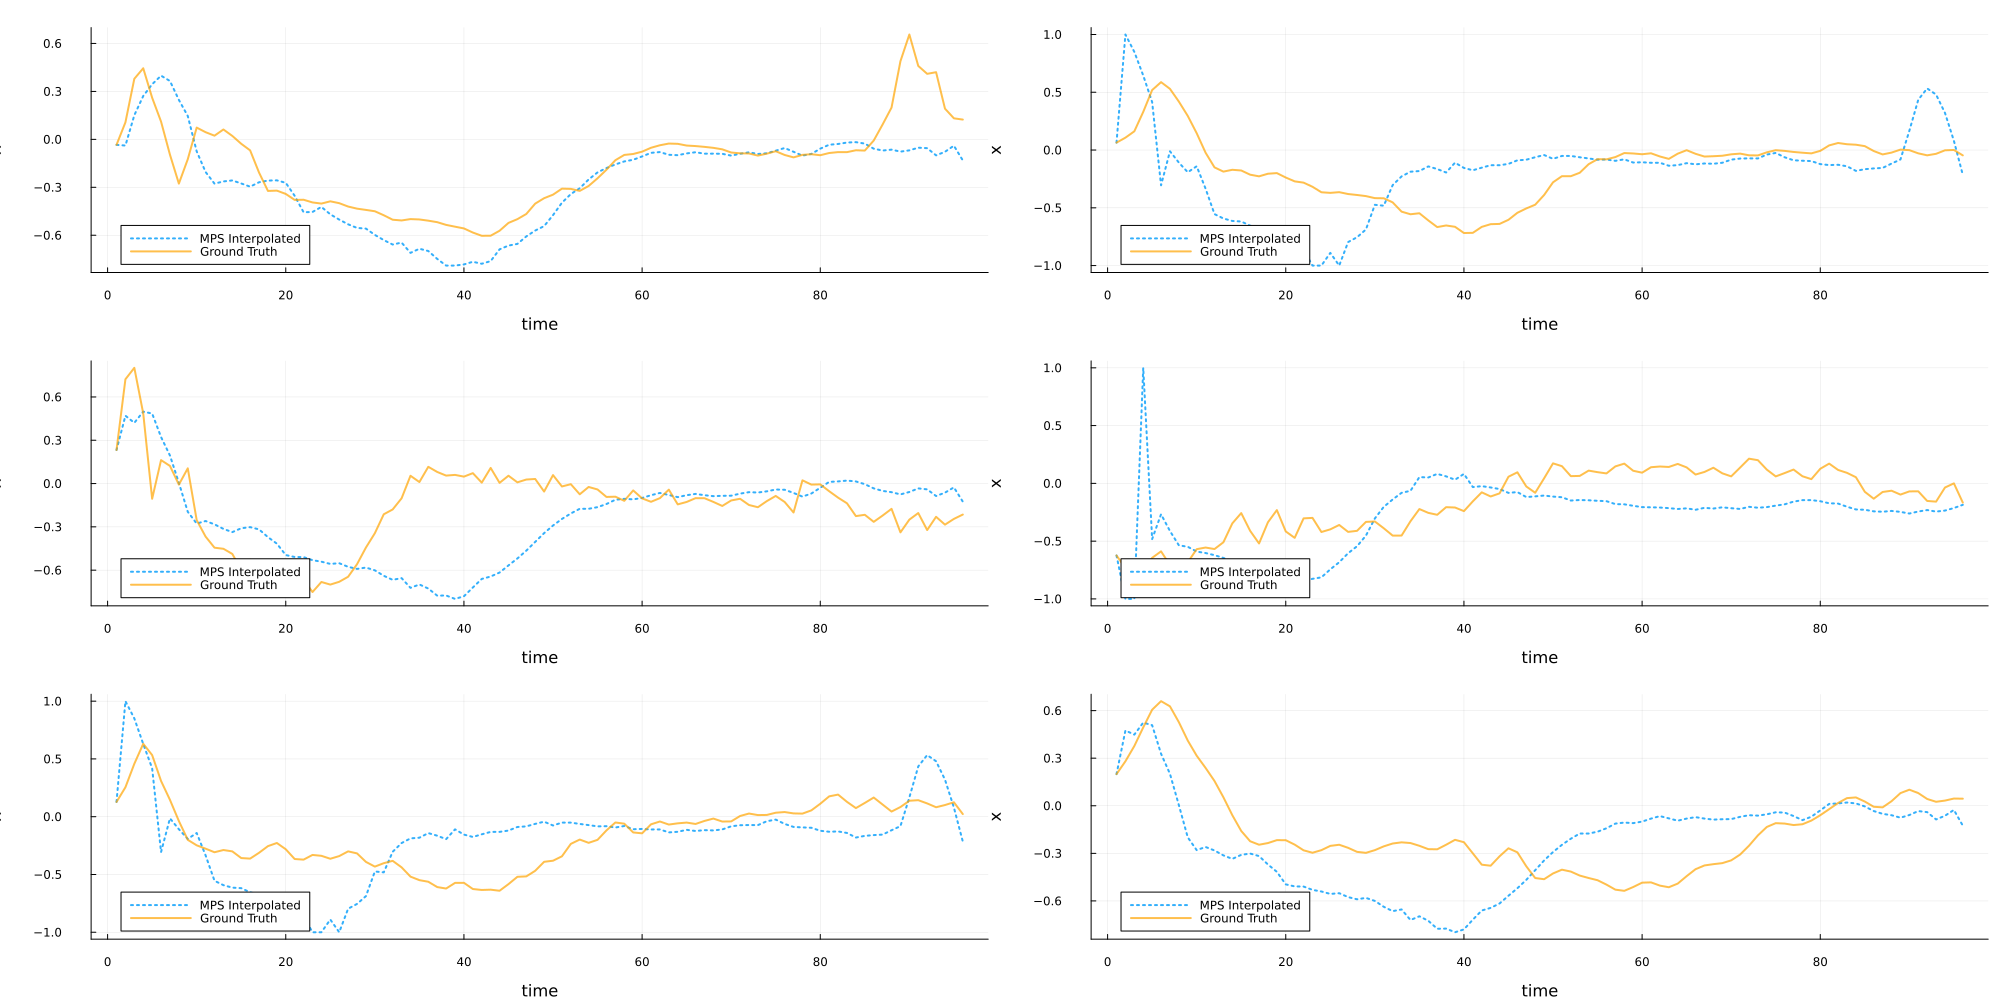

In [7]:

p1 = plot(ps[1:6]..., size=(2000,1000), layout=(3,2))
p2= plot(ps[7:12]..., size=(2000,1000), layout=(3,2));
savefig(p1, "figs/ecg200_Ex1_ns.svg")
savefig(p2, "figs/ecg200_Ex2_ns.svg")
display(p1)

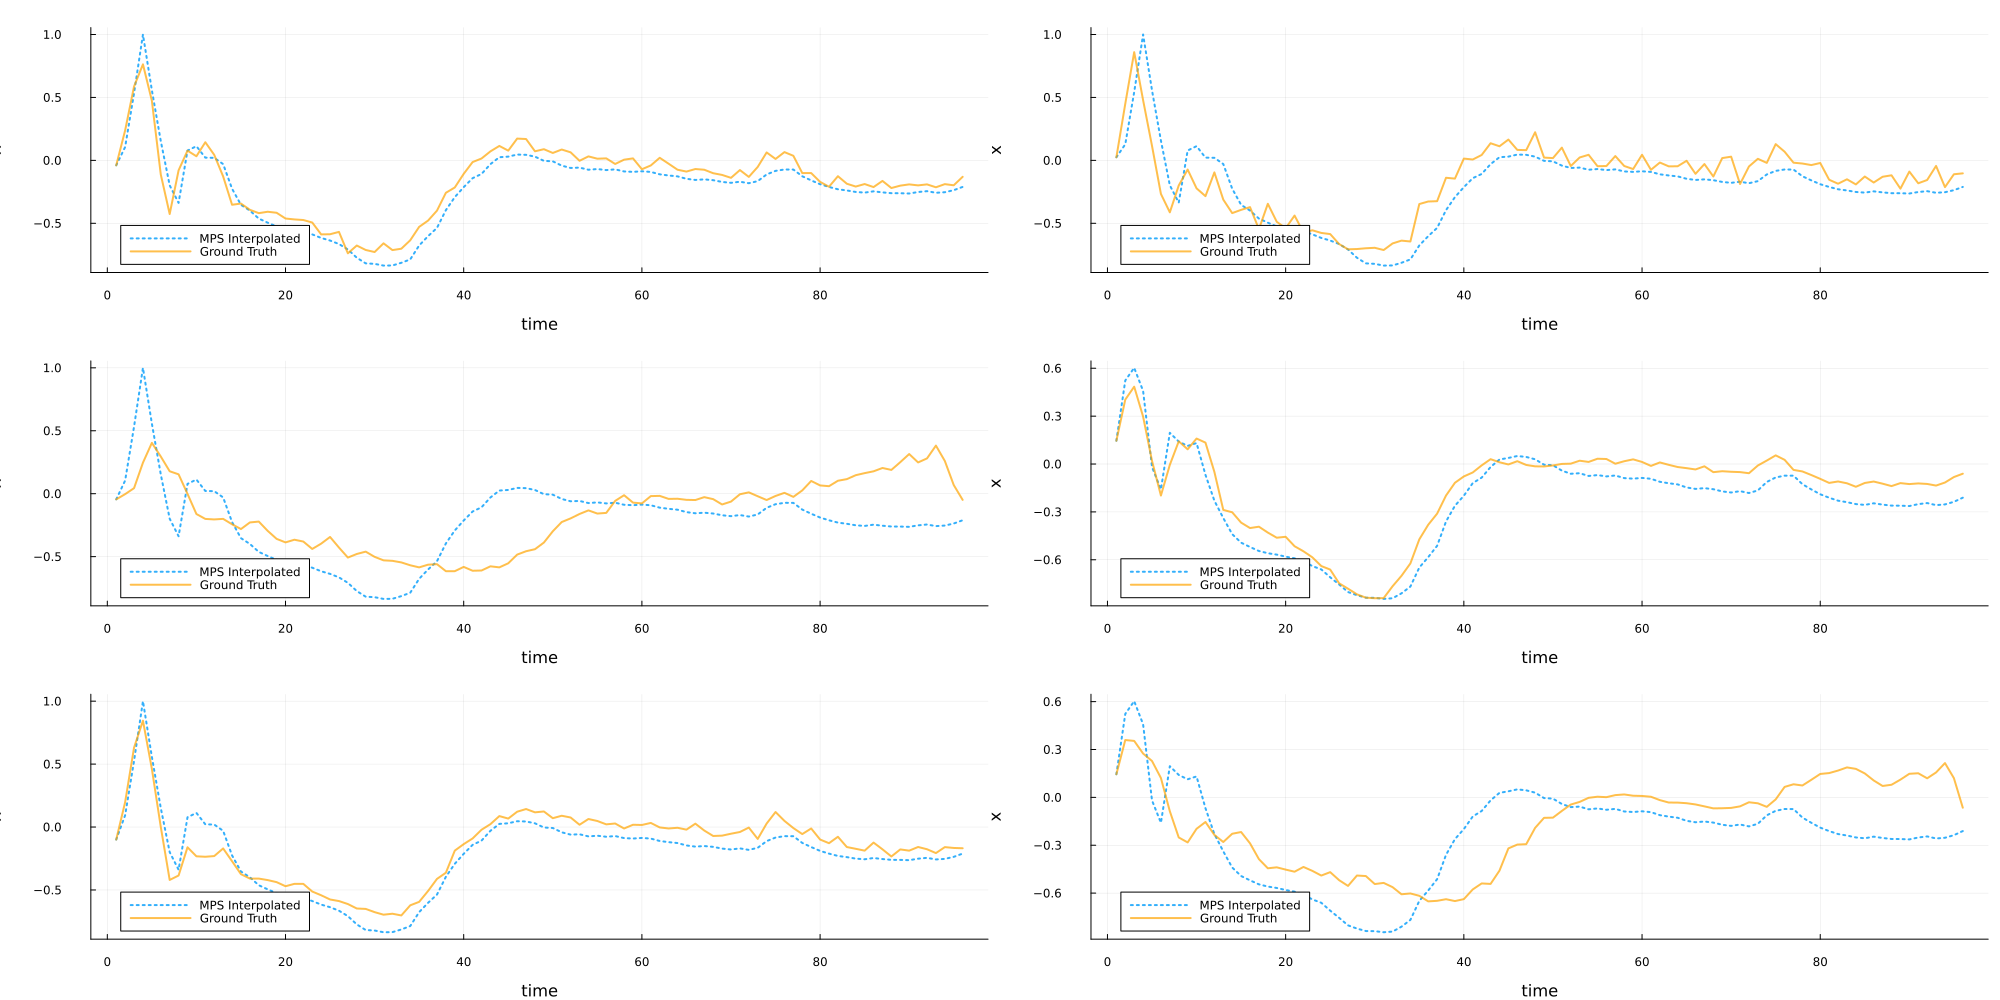

In [8]:
display(p2)

# Italy Power Demand

In [17]:
svpath = "../paper/italypower/mps_saves/legendreNN2_d12_chi60.jld2"
f = jldopen(svpath, "r")
    X_train_scaled = read(f, "X_train_scaled")
    y_train = read(f, "y_train")
    X_test_scaled = read(f, "X_test_scaled")
    y_test = read(f, "y_test");
    mps = read(f, "mps")
    opts = read(f, "opts")
close(f)

fc = load_forecasting_info_variables(mps, X_train_scaled, y_train, X_test_scaled, y_test, opts);

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 67 training samples and 1029 testing samples.
 - 2 class(es) was detected. Slicing MPS into individual states...
 - Time independent encoding - Legendre_No_Norm - detected.
 - d = 12, chi_max = 60

 Created 2 forecastable struct(s) containing class-wise mps and test samples.


In [18]:
ns = 6


samples = [1:ns; 1:ns]
classes = [zeros(Int,ns); ones(Int,ns)]

ps = []
for (i,s) in enumerate(samples)
    class = classes[i]
    interp_sites = collect(2:size(X_train_scaled,2))
    instance_idx = s
    stat, p1 = any_interpolate_single_time_series(fc, class, instance_idx, interp_sites, :directMode; MSE_baseline=false, X_train_scaled=X_train_scaled, y_train=y_train);
    push!(ps, p1)
end

╭────────┬────────────╮
│ Metric │      Value │
├────────┼────────────┤
│  SMAPE │   0.309044 │
│    MSE │ 0.00906757 │
│   MAPE │   0.444438 │
│    MAE │  0.0828311 │
│   RMSE │ 0.00906757 │
╰────────┴────────────╯
╭────────┬───────────╮
│ Metric │     Value │
├────────┼───────────┤
│  SMAPE │  0.466244 │
│    MSE │ 0.0223786 │
│   MAPE │   1.49425 │
│    MAE │  0.115969 │
│   RMSE │ 0.0223786 │
╰────────┴───────────╯
╭────────┬───────────╮
│ Metric │     Value │
├────────┼───────────┤
│  SMAPE │  0.323692 │
│    MSE │ 0.0145789 │
│   MAPE │  0.352426 │
│    MAE │ 0.0949807 │
│   RMSE │ 0.0145789 │
╰────────┴───────────╯
╭────────┬───────────╮
│ Metric │     Value │
├────────┼───────────┤
│  SMAPE │  0.329753 │
│    MSE │ 0.0102586 │
│   MAPE │  0.500739 │
│    MAE │ 0.0851525 │
│   RMSE │ 0.0102586 │
╰────────┴───────────╯
╭────────┬────────────╮
│ Metric │      Value │
├────────┼────────────┤
│  SMAPE │   0.196952 │
│    MSE │ 0.00762469 │
│   MAPE │   0.230211 │
│    MAE │  0.06882

In [19]:

p1 = plot(ps[1:6]..., size=(2000,1000), layout=(3,2))
p2= plot(ps[7:12]..., size=(2000,1000), layout=(3,2))
savefig(p1, "figs/IPD_Ex1.svg")
savefig(p2, "figs/IPD_Ex2.svg")

"/home/noodles/Documents/QML Project/QuantumInspiredML/Interpolation/Interp_benchmarks/figs/IPD_Ex2.svg"

# Kepler 125

In [21]:
svpath = "../paper/NASA_kepler/mps_saves/legendreNN2_d12_chi35.jld2"
f = jldopen(svpath, "r")
    X_train_scaled = read(f, "X_train_scaled")
    y_train = read(f, "y_train")
    X_test_scaled = read(f, "X_test_scaled")
    y_test = read(f, "y_test");
    mps = read(f, "mps")
    opts = read(f, "opts")
close(f)

fc = load_forecasting_info_variables(mps, X_train_scaled, y_train, X_test_scaled, y_test, opts);

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 36 training samples and 11 testing samples.
 - 1 class(es) was detected. Slicing MPS into individual states...
 - Time independent encoding - Legendre_No_Norm - detected.
 - d = 12, chi_max = 35

 Created 1 forecastable struct(s) containing class-wise mps and test samples.


In [22]:
ns = 6


samples = 1:ns
classes = zeros(Int,ns)

ps = []
for (i,s) in enumerate(samples)
    class = classes[i]
    interp_sites = collect(2:size(X_train_scaled,2))
    instance_idx = s
    stat, p1 = any_interpolate_single_time_series(fc, class, instance_idx, interp_sites, :directMode; MSE_baseline=false, X_train_scaled=X_train_scaled, y_train=y_train);
    push!(ps, p1)
end

╭────────┬──────────╮
│ Metric │    Value │
├────────┼──────────┤
│  SMAPE │  1.16884 │
│    MSE │ 0.710119 │
│   MAPE │   1.9757 │
│    MAE │  0.64717 │
│   RMSE │ 0.710119 │
╰────────┴──────────╯
╭────────┬───────────╮
│ Metric │     Value │
├────────┼───────────┤
│  SMAPE │  0.306734 │
│    MSE │ 0.0436427 │
│   MAPE │   0.98824 │
│    MAE │  0.111771 │
│   RMSE │ 0.0436427 │
╰────────┴───────────╯
╭────────┬─────────╮
│ Metric │   Value │
├────────┼─────────┤
│  SMAPE │ 1.31525 │
│    MSE │ 1.47362 │
│   MAPE │ 4.75967 │
│    MAE │ 1.01305 │
│   RMSE │ 1.47362 │
╰────────┴─────────╯
╭────────┬──────────╮
│ Metric │    Value │
├────────┼──────────┤
│  SMAPE │  1.05195 │
│    MSE │ 0.654386 │
│   MAPE │  1.91659 │
│    MAE │ 0.585215 │
│   RMSE │ 0.654386 │
╰────────┴──────────╯
╭────────┬─────────╮
│ Metric │   Value │
├────────┼─────────┤
│  SMAPE │ 1.35108 │
│    MSE │  1.5727 │
│   MAPE │ 3.17522 │
│    MAE │ 1.05782 │
│   RMSE │  1.5727 │
╰────────┴─────────╯
╭────────┬─────────

In [23]:
p1 = plot(ps[1:6]..., size=(2000,1000), layout=(3,2))
savefig(p1, "figs/Keps_Ex125.svg")


"/home/noodles/Documents/QML Project/QuantumInspiredML/Interpolation/Interp_benchmarks/figs/Keps_Ex125.svg"

# Kepler 564

In [24]:
f = jldopen("../paper/NASA_kepler/mps_saves/legendreNN_s564_d12_chi34.jld2")
X_train_scaled = read(f, "X_train_scaled")
y_train = read(f, "y_train")
X_test_scaled = read(f, "X_test_scaled")
y_test = read(f, "y_test");
mps = read(f, "mps")
opts = read(f, "opts")
close(f)

fc = load_forecasting_info_variables(mps, X_train_scaled, y_train, X_test_scaled, y_test, opts);

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 21 training samples and 26 testing samples.
 - 1 class(es) was detected. Slicing MPS into individual states...
 - Time independent encoding - Legendre_No_Norm - detected.
 - d = 12, chi_max = 34

 Created 1 forecastable struct(s) containing class-wise mps and test samples.


In [25]:
ns = 6


samples = 1:ns
classes = zeros(Int,ns)

ps = []
for (i,s) in enumerate(samples)
    class = classes[i]
    interp_sites = collect(2:size(X_train_scaled,2))
    instance_idx = s
    stat, p1 = any_interpolate_single_time_series(fc, class, instance_idx, interp_sites, :directMode; MSE_baseline=false, X_train_scaled=X_train_scaled, y_train=y_train);
    push!(ps, p1)
end

╭────────┬──────────╮
│ Metric │    Value │
├────────┼──────────┤
│  SMAPE │   1.0502 │
│    MSE │ 0.610866 │
│   MAPE │  3.28906 │
│    MAE │ 0.602069 │
│   RMSE │ 0.610866 │
╰────────┴──────────╯
╭────────┬─────────╮
│ Metric │   Value │
├────────┼─────────┤
│  SMAPE │ 1.66631 │
│    MSE │ 1.39467 │
│   MAPE │ 2.78542 │
│    MAE │ 1.03211 │
│   RMSE │ 1.39467 │
╰────────┴─────────╯
╭────────┬─────────╮
│ Metric │   Value │
├────────┼─────────┤
│  SMAPE │ 1.91209 │
│    MSE │ 1.29201 │
│   MAPE │ 2.45006 │
│    MAE │  1.0235 │
│   RMSE │ 1.29201 │
╰────────┴─────────╯
╭────────┬───────────╮
│ Metric │     Value │
├────────┼───────────┤
│  SMAPE │  0.303346 │
│    MSE │ 0.0103639 │
│   MAPE │  0.592996 │
│    MAE │ 0.0866157 │
│   RMSE │ 0.0103639 │
╰────────┴───────────╯
╭────────┬──────────╮
│ Metric │    Value │
├────────┼──────────┤
│  SMAPE │ 0.670509 │
│    MSE │ 0.107538 │
│   MAPE │  2.70699 │
│    MAE │ 0.261254 │
│   RMSE │ 0.107538 │
╰────────┴──────────╯
╭────────┬─────────

In [26]:
p1 = plot(ps[1:6]..., size=(2000,1000), layout=(3,2))
savefig(p1, "figs/Keps_Ex564.svg")


"/home/noodles/Documents/QML Project/QuantumInspiredML/Interpolation/Interp_benchmarks/figs/Keps_Ex564.svg"